In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
import plotly
import plotly.express as px
from scipy.stats import shapiro
from scipy import stats
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
from scipy.stats import chi2_contingency
import statsmodels.api as sm

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.drop(columns=['id'],axis=1,inplace=True)
df['bmi'].fillna(df['bmi'].mean(),inplace=True)
df['gender'] = df['gender'].replace(to_replace = 'Other',value='Male',regex=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [3]:
def dist_box(data):
 # fonksiyon, sürekli değişkenin tek değişkenli analizi için birleşik bir grafik çizer 
 #yayılma, merkezi eğilim, dağılım ve aykırı değerleri kontrol etmek
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle(Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
     # görselleştirmeyi daha iyi hale getirmeye çalışıyorum. Bu, arka planı beyaza ayarlayacaktır
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [4]:
dfnumeric=df.select_dtypes(include=['float64'])

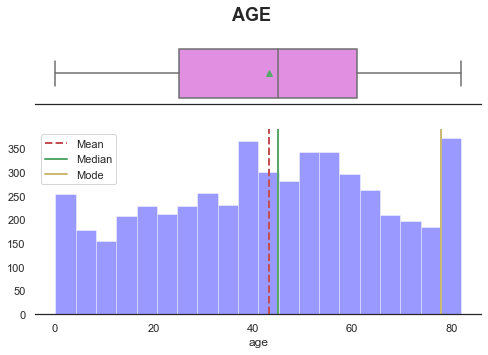

In [6]:
#select all quantitative columns for checking the spread
list_col=  ['age','avg_glucose_level','bmi']
for i in range(len(list_col)):
    dist_box(df[list_col[i]])
    #plt.savefig('bmi.png')

# Betimsel İstatistik

In [3]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# İstatistik Testleri

## **Shapiro Wilk Testi**
- **İstatistikte uygulanan birçok analiz ve tahmin
yöntemleri X değişkeninin Normal dağılış göstermesi
halinde geçerlidir. Bu nedenle dağılışın Normal olamadığı
hallerde yapılan analiz geçerliliğini kaybeder. Dolayısıyla
bu dağılış istatistikte önemli bir yere sahiptir.**

- **Verilere parametrik testlerin uygulanabilmesi için
verilerin dağılımının normal olması gerekmektedir**

## **$H_0$:** Veri setinin dağılımı normaldir
## **$H_1$:**Veri setinin dağılımı normal değildir



![Dağılım](http://genderi.org/bolum-13-istatistikte-tahmin-ve-hipotez-testleri-istatistik/12800_html_6abf19fa.jpg)

In [5]:
dfnumeric=df.select_dtypes(include=['float64','int64'])
alpha=0.05
for i in dfnumeric.columns:
    if (i!='hypertension' and i!='heart_disease'):
            stat,p=shapiro(dfnumeric[i])
            print(dfnumeric[i].describe(),"\n" "Statistic: %.3f, P =" %stat , p)
            #print("-------------------------------------------------------")
            if p >alpha:
                print('Orneklem Normal (Gaussian) dağılımdan gelmektedir(fail to reject)')
            else:
                print('Orneklem Normal (Gaussian) dağılımından gelmemektedir(reject H0)')
                print("-------------------------------------------------------")

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64 
Statistic: 0.967, P = 1.3734279099703845e-32
Orneklem Normal (Gaussian) dağılımından gelmemektedir(reject H0)
-------------------------------------------------------
count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64 
Statistic: 0.806, P = 0.0
Orneklem Normal (Gaussian) dağılımından gelmemektedir(reject H0)
-------------------------------------------------------
count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64 
Statistic: 0.952, P = 4.284667918016291e-38
Orneklem Normal (Gaussian) dağılımından gelm

In [6]:
# İnme geçirip geçirmediğine göre şhapiro wilk testi # Doğru olup olmadığını sor 
strokeuniq=pd.unique(df.stroke.values)
alpha=0.05
for i in dfnumeric.columns:
    if (i!='hypertension' and i!='heart_disease'):
        for name in strokeuniq:
            stat,p=shapiro(dfnumeric[i][dfnumeric['stroke']==name])
            print()
            print(i)
            print("-------------------------------------------------------")
            print(name,"Statistic: %.3f | " %stat , "P Value:  %.3f ="%p)        
            if p >alpha:
                print('Orneklem Normal (Gaussian) dağılımdan gelmektedir(fail to reject)')  
            else:
                print('Orneklem Normal (Gaussian) dağılımından gelmemektedir(reject H0)')


age
-------------------------------------------------------
1 Statistic: 0.878 |  P Value:  0.000 =
Orneklem Normal (Gaussian) dağılımından gelmemektedir(reject H0)

age
-------------------------------------------------------
0 Statistic: 0.970 |  P Value:  0.000 =
Orneklem Normal (Gaussian) dağılımından gelmemektedir(reject H0)

avg_glucose_level
-------------------------------------------------------
1 Statistic: 0.871 |  P Value:  0.000 =
Orneklem Normal (Gaussian) dağılımından gelmemektedir(reject H0)

avg_glucose_level
-------------------------------------------------------
0 Statistic: 0.804 |  P Value:  0.000 =
Orneklem Normal (Gaussian) dağılımından gelmemektedir(reject H0)

bmi
-------------------------------------------------------
1 Statistic: 0.931 |  P Value:  0.000 =
Orneklem Normal (Gaussian) dağılımından gelmemektedir(reject H0)

bmi
-------------------------------------------------------
0 Statistic: 0.951 |  P Value:  0.000 =
Orneklem Normal (Gaussian) dağılımından g

# Levene Testi:

- [x]  T-Testi ve Anova Testi İçin varsayımlarından biridir 
- [x]  Levene testinin sonucunun 0.05'den büyük olması gerekir

## **$H_0$:** Varyanslar arasında fark yoktur
## **$H_1$:**Varyanslar arasında fark vardır

In [9]:
def levenetest(data, column1): 
    alpha=0.05
    for i in data.columns:
        levene_results = stats.levene(data[i],data[column1])
        matrix_levene = [[ i,'Test Statistic', 'p-value'],
                             ['Veri Seti',levene_results[0], levene_results[1]]]
        levene_table = ff.create_table(matrix_levene, index=True)
        iplot(levene_table, filename='levene-table')   
        if levene_results[1] > alpha:
            print('Orneklem için varyans homojendir (Fail to Reject H0))')
        else:
            print('Orneklem için varyans homojen degildir.(reject H0)')

In [12]:
levenetest(dfnumeric,"stroke")

Orneklem için varyans homojen degildir.(reject H0)


Orneklem için varyans homojen degildir.(reject H0)


Orneklem için varyans homojendir (Fail to Reject H0))


Orneklem için varyans homojen degildir.(reject H0)


Orneklem için varyans homojen degildir.(reject H0)


Orneklem için varyans homojendir (Fail to Reject H0))


# KATEGORİK DEĞİŞKENLERDE TESTLER

### **Eğer iki kategorik değişken arasında ilişki olup olmadığını merak ediyorsak kullanacağımız istatistik yöntemi Pearson Ki-Kare testi olacaktır**
- [x] Kategorik değişkenlerin analizleri genelde frekanslar üzerinden yapılır.
>  **Önemli Not: Frekans bir değişkendeki kategorilerin (elemanların) gözlem sayısıdır**


### **Ki-Kare testi her bir kategori çiftine düşen frekans sayısı ile bu durumlara şansla düşebilecek frekans sayılarının karşılaştırılmasına dayanır. Gözlenen frekans ile beklenen frekans karşılaştırması diyebiliriz.**

In [15]:
"""Örneğin inme geçiren ve geçirmeyen  kişilerin Cinsiyetlerine göre dağılımını merak ettiğimiz
bir araştırma sorusunda 4 farklı durum ortaya çıkabilir (0-Kadın, 0-Erkek, 1-Kadın,ve 1-Erkek ).
Bu durumların hepsini aşağıdaki çaprazlık
tablosu ile gösterebiliriz:"""

#Ortalamasını görebilirim
ort = pd.crosstab(df['gender'], df['stroke'],margins=True,margins_name="Toplam")
ort

stroke,0,1,Toplam
gender,,,
Female,2853,141,2994
Male,2008,108,2116
Toplam,4861,249,5110


In [16]:
a = 2994*4861/5110
b = 2116*4861/5110
c = 2994*249/5110
d = 2116*249/5110

In [38]:
x1=(2853-a)**2/a
x2=(2008-b)**2/b
x3=(141-c)**2/c
x4=(108-c)**2/d

In [48]:
ki_kare_value = (x1+x2+x3+x4)
ki_kare_value
# Budeğerin anlamlı bir fark doğurup doğurmadığını test edebilmemiz için serbestlik değerine ihtiyacımız vardır.
# Değişkenlerimizin kategorisi ikişer kategoridir yani: (2-1) x (2-1) = 1 =serbestlik derecesi
#Daha sonra bu sd ve ki-kare değerlerini alarak istatistik tablolarından
#bulabileceğimiz kritik değer ile karşılaştırdığımızda ki-kare sonucunun
#anlamlı bulunup bulunmadığını test edebiliriz
#https://www.socscistatistics.com/pvalues/chidistribution.aspx
# > The P-Value is .000173. The result is significant at p < .05.

# Eğer p-değeri 0.05’ten küçük bulunursa cinsiyet ile inme geçirme arasında bir ilişki vardır şeklinde belirtebiliriz.

14.109177119038986

![KiKare](kare-tablosu_LI.jpg)

In [21]:
# Kritik değeri hesaplama:
crit = stats.chi2.ppf(q = 0.95, # % 95 güven için kritik değeri bulur
                      df = 3)   
print("Kritik Değer",crit)

Kritik Değer 7.814727903251179


In [27]:
p_value = 1- stats.chi2.cdf(x=14.109177119038986,  # Find the p-value
                             df=1)
#https://www.socscistatistics.com/pvalues/chidistribution.aspx
# > The P-Value is .000173. The result is significant at p < .05.

# H0: İnme geçirme durumunun kadın ve erkek arasında fark yoktur
# H1: İnme geçirme durumunun kadın ve erkek arasında fark vardır
alpha=0.05 # Belirlediğimiz değer
if p_value > alpha:
    print('İkisi arasında bağ yoktur (Fail to Reject H0))')
else:
    print('İkisi arasında bağ vardır.(reject H0)')
print("P-value Değeri",p_value)

İkisi arasında bağ vardır.(reject H0)
P-value Değeri 0.00017250012855207775


In [73]:
S = pd.crosstab(df['Residence_type'],df['stroke'])

In [74]:
def ki_kare(crosstable, alpha = 0.05):
    chi2, p, dof, expected = stats.chi2_contingency(crosstable,correction=False,)
    
    #dof = observed.size - sum(observed.shape) + observed.ndim - 1
    print(f"Ki-Kare Test İstatistiği {chi2}")
    print(f"P-value değeri {p}")
    print(f"Serbestlik Derecesi (num rows - 1) * (num columns - 1): {dof}")
    #print(f"Tablonun marjinal toplamlarına dayalı beklenen frekanslar {expected}")
    display(S)
    #display(pd.DataFrame(expected))
    # Kritik değeri hesaplama:
    crit = stats.chi2.ppf(q = 0.95, # % 95 güven için kritik değeri bulur
                      df = dof)
    print("Kritik Değer",crit)
    if p > alpha:
        print('İkisi arasında bağ yoktur (Fail to Reject H0))')
    else:
        print('İkisi arasında bağ vardır.(reject H0)')

In [75]:
ki_kare(S)

Ki-Kare Test İstatistiği 1.2210278401168941
P-value değeri 0.26915903227493193
Serbestlik Derecesi (num rows - 1) * (num columns - 1): 1


stroke,0,1
Residence_type,,
Rural,2400,114
Urban,2461,135


Kritik Değer 3.841458820694124
İkisi arasında bağ yoktur (Fail to Reject H0))


# MANN WHITNEY-U Testi
### * Mann-Whitney U testi, bağımsız iki grubun karşılaştırılması için kullanılan parametrik olmayan bir testtir.
### *  Parametrik test varsayımları yerine getirilmeden, iki ortalama arasındaki farkın önemlilik testinin uygulanması varılan kararın hatalı olmasına neden olabilir. Parametrik test varsayımları yerine gelmediğinde kullanılabilecek en güçlü testtir.

In [69]:
mask = (df['Residence_type'] == "Urban") & (df['gender'] == 'Female')
mask2 = (df['Residence_type'] == "Rural") & (df['gender'] == 'Female')
kent_kadın = df.loc[mask]['bmi'].copy()
kırsal_kadın = df.loc[mask2]['bmi'].copy()

In [71]:
def mannwhitneyu(x,y,alpha=0.05):
    man = stats.mannwhitneyu(x,y,alternative='two-sided')
    p= man.pvalue
    if p > alpha:
        print('H0 Hipotezi reddedilemez')
    else:
        print('H0 Hipotezi reddedilir')
    print("mannwhitneyu p-value:",p)
mannwhitneyu(kent_kadın,kırsal_kadın)

In [28]:
df = pd.get_dummies(df,columns=['gender','ever_married','work_type','Residence_type','smoking_status'],drop_first=True)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [29]:
X =df.drop("stroke",axis = 1)
y = df["stroke"]

In [30]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 stroke   R-squared (uncentered):                   0.125
Model:                            OLS   Adj. R-squared (uncentered):              0.122
Method:                 Least Squares   F-statistic:                              45.28
Date:                Tue, 04 Jan 2022   Prob (F-statistic):                   5.53e-134
Time:                        13:04:55   Log-Likelihood:                          808.88
No. Observations:                5110   AIC:                                     -1586.
Df Residuals:                    5094   BIC:                                     -1481.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------